# Symmetric true distribution data analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

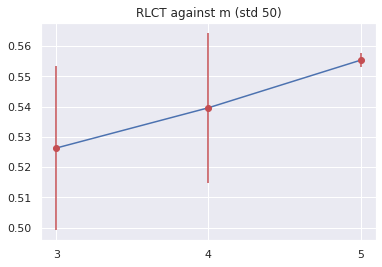

[0.5263015005861379, 0.5395906411771777, 0.5553037845257255]
[0.9838506370781506, 0.9912413114579127, 0.9930927521417869]


In [2]:
plt.figure()
plt.title("RLCT against m (std 50)")
data50 = [[0.5271172429893319,0.5591768693599343,0.49261038940914725],
          [0.5420474057567719,0.5080945504674356,0.5686299673073256],
          [0.5539475848184765,0.5533613146282719,0.5586024541304281]]
estimates50 = [np.mean(x) for x in data50]
estimates50_err = [np.std(x) for x in data50]
plt.errorbar(x=[3,4,5], y=estimates50, yerr=estimates50_err,fmt='ro')
plt.plot([3, 4, 5],estimates50)
plt.xticks(np.arange(3, 6, step=1))
plt.show()
print(estimates50)

rsquared50 = [[0.998783004077668,0.9649490691880381,0.9878198379687456],
             [0.9887534458845095,0.9937238295108946,0.991246658978334],
             [0.9960659173651388,0.9899489193349412,0.9932634197252808]]
rsquared50_mean = [np.mean(x) for x in rsquared50]
print(rsquared50_mean)

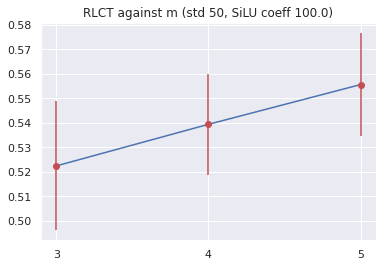

[0.9787706282215692, 0.9884958806637307, 0.9909713070931997]


In [3]:
plt.figure()
plt.title("RLCT against m (std 50, SiLU coeff 100.0)")
data50_silu = [[0.5244996788453574,0.5535518447066355,0.48912843180387144],
               [0.5571599313789063,0.550754269071294,0.510249421491744],
               [0.5749209396585857,0.5261335156164059,0.5658356327571098]]
estimates50_silu = [np.mean(x) for x in data50_silu]
estimates50_silu_err = [np.std(x) for x in data50_silu]
plt.errorbar(x=[3,4,5], y=estimates50_silu, yerr=estimates50_silu_err,fmt='ro')
plt.plot([3, 4, 5],estimates50_silu)
plt.xticks(np.arange(3, 6, step=1))
plt.show()

# Seaborn version
#data50_silu_dict = {'m':[3,3,3,4,4,4,5,5,5], 'RLCT':data50_silu[0] + data50_silu[1] + data50_silu[2]}
#df_silu = pd.DataFrame(data50_silu_dict)
#print(df)
#sns.relplot(x="m",y="RLCT",kind="line",ci="sd",data=df_silu)

rsquared50 = [[0.9868292519146643,0.963782868861246,0.9856997638887972],
             [0.9738846583906348,0.9953297417420298,0.9962732418585274],
             [0.9945847272933928,0.9879877330663542,0.9903414609198519]]
rsquared50_mean = [np.mean(x) for x in rsquared50]
print(rsquared50_mean)

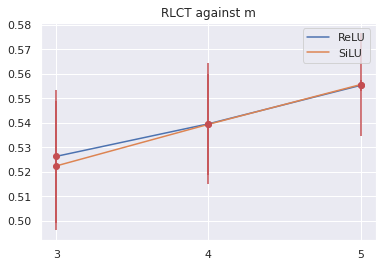

ReLU estimates: [0.5263015005861379, 0.5395906411771777, 0.5553037845257255]
ReLU std      : [0.027181772569265468, 0.02477446187971897, 0.0023447592704756476]
SiLU estimates: [0.5223933184519548, 0.539387873980648, 0.5556300293440337]
SiLU std      : [0.02634288769402701, 0.020769291233066214, 0.02118441159495362]


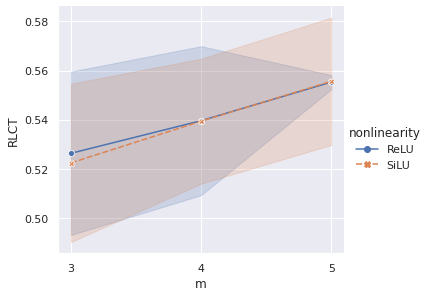

In [4]:
path = "./"

plt.figure()
plt.title("RLCT against m")
#plt.errorbar(x=[3,4,5], y=estimates20, yerr=estimates20_err,fmt='ro')
plt.errorbar(x=[3,4,5], y=estimates50, yerr=estimates50_err,fmt='ro')
plt.errorbar(x=[3,4,5], y=estimates50_silu, yerr=estimates50_silu_err,fmt='ro')
#plt.errorbar(x=[3,4,5], y=estimates60, yerr=estimates60_err,fmt='ro')
#plt.plot([3, 4, 5],estimates20, label='20')
plt.plot([3, 4, 5],estimates50, label='ReLU')
plt.plot([3, 4, 5],estimates50_silu, label='SiLU')
#plt.plot([3, 4, 5],estimates60, label='60')
plt.xticks(np.arange(3, 6, step=1))
plt.legend()
plt.show()

# Seaborn version
data50_combined_dict = {'m':[3,3,3,4,4,4,5,5,5,3,3,3,4,4,4,5,5,5], 
                        'nonlinearity':['ReLU','ReLU','ReLU','ReLU','ReLU','ReLU','ReLU','ReLU','ReLU',
                                        'SiLU','SiLU','SiLU','SiLU','SiLU','SiLU','SiLU','SiLU','SiLU'],
                        'RLCT':data50[0] + data50[1] + data50[2] + data50_silu[0] + data50_silu[1] + data50_silu[2]}
df_comb = pd.DataFrame(data50_combined_dict)
#print(df)

ax = sns.relplot(x="m",y="RLCT",hue="nonlinearity",kind="line",ci="sd",aspect=1.2,height=4,markers=True,style="nonlinearity",data=df_comb)
#plt.title('RLCT against m')
plt.xticks(np.arange(3, 6, step=1))
plt.savefig("{}/RLCTplot.png".format(path), format='png', bbox_inches='tight',dpi=500)

print("ReLU estimates: " + str(estimates50))
print("ReLU std      : " + str(estimates50_err))
print("SiLU estimates: " + str(estimates50_silu))
print("SiLU std      : " + str(estimates50_silu_err))